# Day 5 (6/1/2021)

## Phase 0: Preparation

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dict

In [2]:
# import dataset

pc = pd.read_csv("E:/Python/PC Games Sales/Games.csv")
pc

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
...,...,...,...,...,...,...,...
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts


In [3]:
# Info

pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


## Phase 1: Clean Data

In [4]:
# Check Null

pc.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [5]:
# Replace Nul

pc["Series"] = pc["Series"].fillna("Unprovided")

In [6]:
pc.head(5)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unprovided,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unprovided,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unprovided,May-11,Action-adventure,Re-Logic,Re-Logic


In [7]:
# Change Release data type

pd.to_datetime(pc["Release"], errors= "coerce")

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
170          NaT
171          NaT
172   1999-11-01
173   1994-12-01
174          NaT
Name: Release, Length: 175, dtype: datetime64[ns]

In [24]:
pc.head(5)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unprovided,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unprovided,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unprovided,May-11,Action-adventure,Re-Logic,Re-Logic


### 1. How many different Genres ?

In [9]:
# Genre count

pd.value_counts(pc["Genre"].unique()).sum()

61

=> 61 Genres

### 2. How many different Developers ?

In [10]:
# Developer Count

pd.value_counts(pc["Developer"].unique()).sum()

109

109 Developers

### 3. How many different Publishers ?

In [11]:
# Publisher Count

pd.value_counts(pc["Publisher"].unique()).sum()

96

=> 96 Publishers

### 4. Which Genre is used most ?

In [29]:
# Most Genre

most_genre = pc.groupby(by = "Genre")
most_genre = most_genre["Sales"].describe().sort_values(by = "count",ascending = False).head(5)

In [36]:
most_genre = pd.DataFrame(data = most_genre).reset_index()
most_genre

,Genre,count,mean,std,min,25%,50%,75%,max
0,Real-time strategy,24.0,2.291667,2.235663,1.0,1.0,1.5,3.000,11.0
1,First-person shooter,19.0,2.421053,2.949874,1.0,1.0,1.0,2.000,12.0
2,Action role-playing,12.0,4.841667,5.592927,1.0,2.0,3.0,4.125,20.0
3,Construction and management simulation,9.0,2.866667,2.871846,1.0,1.0,2.0,3.000,10.0
4,Role-playing game,8.0,1.387500,0.535690,1.0,1.0,1.0,2.000,2.1


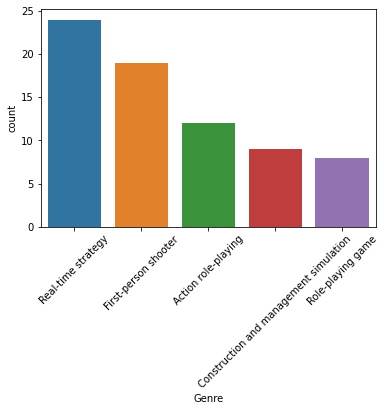

In [78]:
sb.barplot(x = "Genre", y = "count", data = most_genre)
plt.xticks(rotation = 45)
plt.show()

### 5. Which Developer appeared most ?

In [91]:
most_developer = pc.groupby(by = "Developer",as_index= True)
most_developer = most_developer["Sales"].describe().sort_values(by = "count", ascending = False).head(5)

In [119]:
most_developer = pd.DataFrame(data = most_developer, columns=["count"])
most_developer

,count
Developer,
Blizzard Entertainment,8.0
Maxis,6.0
Paradox Development Studio,5.0
id Software,4.0
Westwood Studios,4.0


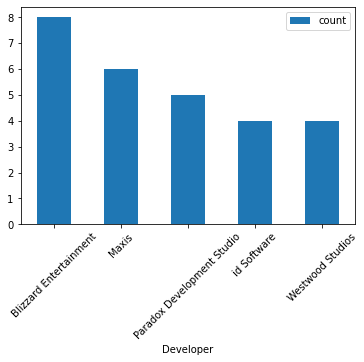

In [100]:
most_developer.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.show()


### 6. Which Publisher appeared most ?

In [126]:
most_publisher = pc.groupby(by = "Publisher")
most_publisher = most_publisher["Sales"].describe().sort_values(by = "count",ascending= False).head(5)
most_publisher

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Electronic Arts,19.0,2.842105,2.713406,1.0,1.00,2.0,3.50,11.0
Blizzard Entertainment,8.0,7.375000,6.968039,1.0,1.75,5.0,11.75,20.0
Paradox Interactive,7.0,1.785714,1.467911,1.0,1.00,1.0,1.75,5.0
Activision,6.0,2.250000,1.993740,1.0,1.00,1.0,3.25,5.5
GT Interactive,5.0,1.200000,0.447214,1.0,1.00,1.0,1.00,2.0


In [135]:
most_publisher = pd.DataFrame(data = most_publisher, columns = ["count"])
most_publisher

,count
Publisher,
Electronic Arts,19.0
Blizzard Entertainment,8.0
Paradox Interactive,7.0
Activision,6.0
GT Interactive,5.0


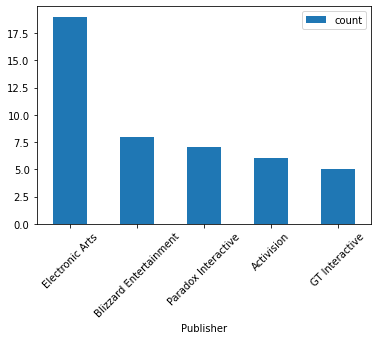

In [137]:
most_publisher.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.show()

### 7. Sales by Developer

In [157]:
sale_developer = pd.pivot_table(data = pc,values = "Sales", index= "Developer", aggfunc= "sum")
sale_developer = sale_developer.sort_values(by = "Sales", ascending = False).head(10)

In [160]:
sale_developer = pd.DataFrame(data = sale_developer, columns = ["Sales"]).reset_index()
sale_developer
sale_developer

,Developer,Sales
0,Blizzard Entertainment,58.0
1,PUBG Studios,42.0
2,Mojang Studios,33.0
3,Maxis,33.0
4,Facepunch Studios,29.0
5,Valve,25.0
6,CD Projekt Red,20.5
7,Re-Logic,17.2
8,Firaxis Games,13.0
9,Frontier Developments,12.0


<AxesSubplot:xlabel='Developer'>

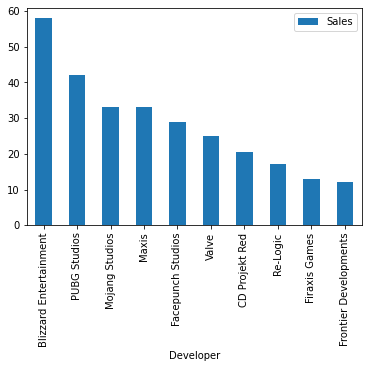

In [163]:
sale_developer.plot(kind = "bar", x = "Developer")